# Regresión lineal

In [1]:
# Importar paquetes

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="ticks") # Configurar los ejes

## Ejemplo 1

In [2]:
data = pd.read_excel("Regresion.xlsx",index_col=0)  # Importar conjunto de datos
data.head()                                         # Mostrar las 5 primeras observaciones 

,Resistencia,% Madera dura
Observación,,
1,160,10
2,171,15
3,175,15
4,179,17
5,182,20


<Figure size 576x360 with 0 Axes>

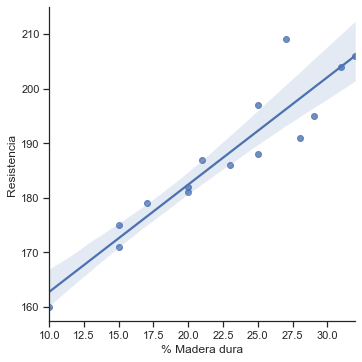

In [3]:
plt.figure(figsize=(8,5))     # Definir tamaño de la imagen
sns.lmplot(y="Resistencia", x="% Madera dura", data= data)   # Construir el gráfico
plt.savefig("Dispersión.jpg") # Guardar imágenes
plt.show()

## Ejemplo 2

In [4]:
data = pd.read_csv("winequality-white.csv",sep=";") # Importar el conjunto de datos
print(data.columns)                               # Imprimir las columnas

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


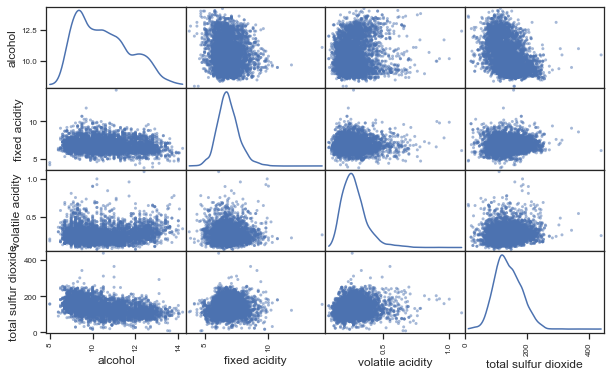

In [12]:
df = data[["alcohol",'fixed acidity', 'volatile acidity', 'total sulfur dioxide']]  # Filtrar varias columnas
pd.plotting.scatter_matrix(df,figsize=(10,6),diagonal="kde") # Matriz de graficos (dispersión e histograma)
plt.show()

Pendiente: -0.10075 		 Punto de corte: 9.370


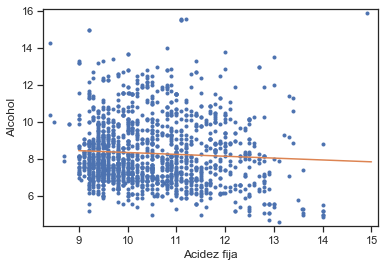

In [4]:
# Definir variable dependiente e independientes

y = df["alcohol"]    # Se define una variable dependiente y
X = df[['fixed acidity', 'volatile acidity', 'total sulfur dioxide']]  # Se definen multiples variables independientes

# Inicialmente se intenta ajustar un modelo de regresión simple

_ = plt.plot(y, X["fixed acidity"], marker=".", linestyle="none")
_ = plt.margins(0.02)
_ = plt.xlabel("Acidez fija")
_ = plt.ylabel("Alcohol")

# Ajuste de la regresión lineal usando np.polyfit()

a, b = np.polyfit(y,X["fixed acidity"],1)   # Se ajusta a un polinomio de grado 1
print("Pendiente: %.5f \t\t Punto de corte: %.3f" % (a,b))

# Línea teórica de regresión
x = np.array([9,15])
y_1 = a*x + b
_ = plt.plot(x,y_1)
plt.show()

## Importancia de la exploración de datos - cuarteto de Anscombe

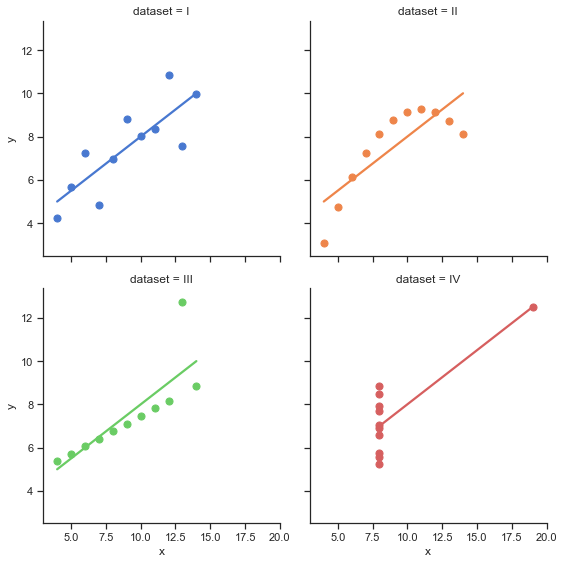

In [9]:
# Cargar los datos del cuarteto de Anscombe
df = sns.load_dataset("anscombe")

# Mostrar los resultados de regresión para los cuatro conjuntos
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})
plt.show()